# Pytorch Workflow

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn # contains all the modules, loss functions, activation functions

torch.__version__

'2.0.1'

## 1. Data Preparation and loading
data can be almost anything. 

In [2]:
# linear regression

weight = 0.7
bias = 0.5

# create
start = 0
end = 10
step = 0.1
X = torch.arange(start, end, step)
Y= weight*X + bias 
Y

tensor([0.5000, 0.5700, 0.6400, 0.7100, 0.7800, 0.8500, 0.9200, 0.9900, 1.0600,
        1.1300, 1.2000, 1.2700, 1.3400, 1.4100, 1.4800, 1.5500, 1.6200, 1.6900,
        1.7600, 1.8300, 1.9000, 1.9700, 2.0400, 2.1100, 2.1800, 2.2500, 2.3200,
        2.3900, 2.4600, 2.5300, 2.6000, 2.6700, 2.7400, 2.8100, 2.8800, 2.9500,
        3.0200, 3.0900, 3.1600, 3.2300, 3.3000, 3.3700, 3.4400, 3.5100, 3.5800,
        3.6500, 3.7200, 3.7900, 3.8600, 3.9300, 4.0000, 4.0700, 4.1400, 4.2100,
        4.2800, 4.3500, 4.4200, 4.4900, 4.5600, 4.6300, 4.7000, 4.7700, 4.8400,
        4.9100, 4.9800, 5.0500, 5.1200, 5.1900, 5.2600, 5.3300, 5.4000, 5.4700,
        5.5400, 5.6100, 5.6800, 5.7500, 5.8200, 5.8900, 5.9600, 6.0300, 6.1000,
        6.1700, 6.2400, 6.3100, 6.3800, 6.4500, 6.5200, 6.5900, 6.6600, 6.7300,
        6.8000, 6.8700, 6.9400, 7.0100, 7.0800, 7.1500, 7.2200, 7.2900, 7.3600,
        7.4300])

In [3]:
len(X), len(Y)

(100, 100)

### Splitting the data into training and testing sets

In [4]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [5]:
len(X_train), len(X_test)

(80, 20)

In [6]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

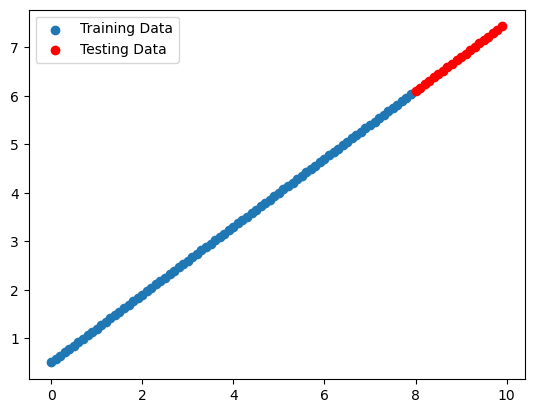

In [7]:
plt.scatter(X_train, Y_train, label='Training Data')
plt.scatter(X_test, Y_test, label='Testing Data', color='r')
plt.legend()

## Building the model

In [8]:
# create a linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        return self.weights*x + self.bias

In [11]:
# create a random seed
torch.manual_seed(42)

# create a model
model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# list named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# make predictions
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([2.8223, 2.8560, 2.8897, 2.9233, 2.9570, 2.9907, 3.0243, 3.0580, 3.0917,
        3.1254, 3.1590, 3.1927, 3.2264, 3.2600, 3.2937, 3.3274, 3.3610, 3.3947,
        3.4284, 3.4620])